In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

text = "Hello, how are you?"
inputs = tokenizer(text, return_tensors="pt")
outputs = model.generate(**inputs, max_length=50)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Hello, how are you?

I'm a little bit of a nerd. I'm a big nerd. I'm a big nerd. I'm a big nerd. I'm a big nerd. I'm a big nerd. I'm a


In [2]:
hf_sd = model.state_dict()
for k,v in hf_sd.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

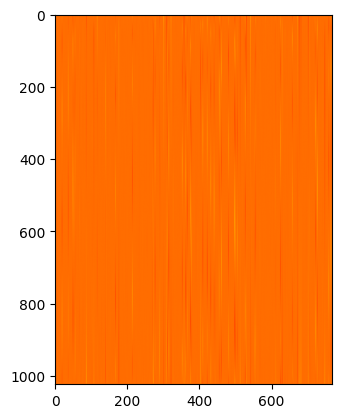

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(hf_sd["transformer.wpe.weight"], cmap="hot")




In [12]:
from transformers import set_seed, pipeline

pipe = pipeline("text-generation", model="gpt2")

set_seed(42)
# generation = pipe("LLamas are ", max_length=50, num_return_sequences=5)
generation = pipe("Hello, I'm a language model,", max_length=30, num_return_sequences=5)
for g in generation:
    print(g["generated_text"])


Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Hello, I'm a language model, and my project will get better with time, but I think there are a lot more things that can help you
Hello, I'm a language model, not a language model, so if I don't have a problem, I can fix it by creating new words
Hello, I'm a language model, and I'm trying to learn some stuff. I'll try to do some basic programming and just learn better ways
Hello, I'm a language model, but I don't believe in grammar. This will work for every language model. You can define it very quickly
Hello, I'm a language model, a model of how things should be, and then we look at different things as well." I'd like to


torch.Size([1, 3, 2, 4])
torch.Size([1, 3, 2, 4])


RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 2